In [2]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'
dtcol, seccol = 'data_date', 'security_id'

In [4]:
with zipfile.ZipFile(os.path.join(data_root, 'security_reference_data_w_ret1d.zip')) as zf:
    df = pd.read_csv(zf.open('security_reference_data_w_ret1d.csv'), 
                     parse_dates=['data_date'],
                     dtype={'security_id': str, 'group_id': 'Int64', 'close_price': np.float64,
                            'volume': 'Int64', 'ret1d': np.float64})

In [5]:
## to make sure there were no duplicates
assert not df.duplicated(subset=[dtcol, seccol]).any()
df.sort_values(by=[dtcol, seccol], inplace=True)

In [6]:
df.head()
print(df.dtypes)
print(df.isnull().sum())
print(df.loc[df['ret1d'].isnull(), dtcol].value_counts())

data_date              datetime64[ns]
security_id                    object
close_price                   float64
volume                          Int64
group_id                        Int64
in_trading_universe            object
ret1d                         float64
dtype: object
data_date                 0
security_id               0
close_price               0
volume                    0
group_id                  0
in_trading_universe       0
ret1d                  8854
dtype: int64
2014-07-31    17
2015-06-25    17
2014-09-24    17
2014-01-31    16
2013-09-27    16
              ..
2015-09-11     1
2015-09-16     1
2015-09-17     1
2015-09-21     1
2017-12-12     1
Name: data_date, Length: 1898, dtype: int64


In [7]:
df.groupby(dtcol).size().plot()

<AxesSubplot:xlabel='data_date'>

In [8]:
alldts = df['data_date'].unique()
allsecs = df.loc[df['in_trading_universe'] == 'Y', 'security_id'].unique()
print(len(alldts))
print(len(allsecs))

2013
3982


In [9]:
rsch_universe = pd.merge(pd.DataFrame({'data_date': alldts, 'inuniv': 1}),
                         pd.DataFrame({'security_id': allsecs, 'inuniv': 1}), on=['inuniv'])

In [10]:
rsch_universe.sort_values(by=['data_date', 'security_id'], inplace=True)
print(rsch_universe.dtypes, '\n\n')
print(df.dtypes, '\n\n')

data_date      datetime64[ns]
inuniv                  int64
security_id            object
dtype: object 


data_date              datetime64[ns]
security_id                    object
close_price                   float64
volume                          Int64
group_id                        Int64
in_trading_universe            object
ret1d                         float64
dtype: object 




In [11]:
assert not df.duplicated(subset=['data_date', 'security_id', 'group_id']).any()

In [12]:
df.groupby(dtcol).size().plot()
rsch_universe.groupby(dtcol).size().plot()
plt.legend(['raw data', 'research universe'], loc='upper left')
plt.title("number of unique security_id")

Text(0.5, 1.0, 'number of unique security_id')

In [13]:
rsch_universe = rsch_universe.merge(df, on=['data_date', 'security_id'], how='left')

In [14]:
rsch_universe['sector_id'] = (rsch_universe['group_id'] / 1e6)

sector_gics_mapping = dict({10: 'Energy', 15: 'Materials', 20: 'Industrials', 25: 'Consumer Discretionary', 
                            30: 'Consumer Staples', 35: 'Health Care', 40: 'Financials', 
                            45: 'Information Technology', 50: 'Communication Services', 55: 'Utilities',
                            60: 'Real Estate'})

industry_gics_mapping = dict({}) ## Not implemented yet
# rsch_universe['industry_id'] = (rsch_universe['group_id'] / 1e2).astype(int).astype(int)

In [15]:
print(rsch_universe.head())
print(rsch_universe.isnull().sum())
print(rsch_universe.shape)
#rsch_universe['sector'] = np.where(rsch_universe['sector_id'].notnull(), rsch_universe['sector_id'].astype(int), np.nan)

   data_date  inuniv security_id  close_price   volume  group_id  \
0 2010-01-04       1      100001          NaN     <NA>      <NA>   
1 2010-01-04       1     1000201        10.15   130339  25503010   
2 2010-01-04       1     1004601         1.55  1563087  45201020   
3 2010-01-04       1      100701        37.00   192260  55102010   
4 2010-01-04       1     1007201        33.78   642910  25101010   

  in_trading_universe     ret1d  sector_id  
0                 NaN       NaN       <NA>  
1                   N  0.031504   25.50301  
2                   N  0.054421   45.20102  
3                   Y  0.014532   55.10201  
4                   Y  0.016857   25.10101  
data_date                    0
inuniv                       0
security_id                  0
close_price            2088591
volume                 2088591
group_id               2088591
in_trading_universe    2088591
ret1d                  2089550
sector_id              2088591
dtype: int64
(8015766, 9)


Text(0.5, 1.0, 'Daily number of stock')

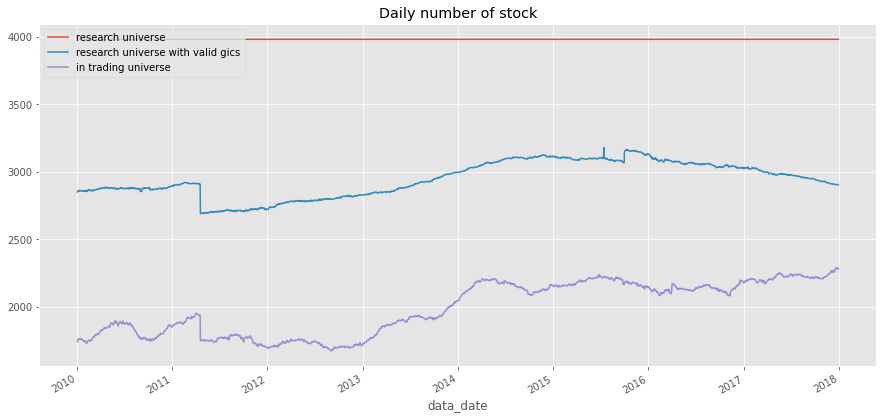

In [16]:
rsch_universe.groupby('data_date').size().plot()
rsch_universe.dropna(subset=['sector_id']).groupby('data_date').size().plot()
df.loc[df['in_trading_universe'] == 'Y'].groupby("data_date").size().plot()
plt.legend(['research universe', 'research universe with valid gics', 'in trading universe'], loc='upper left')
plt.title("Daily number of stock")

In [17]:
print(rsch_universe.head())
print(rsch_universe.isnull().sum())

   data_date  inuniv security_id  close_price   volume  group_id  \
0 2010-01-04       1      100001          NaN     <NA>      <NA>   
1 2010-01-04       1     1000201        10.15   130339  25503010   
2 2010-01-04       1     1004601         1.55  1563087  45201020   
3 2010-01-04       1      100701        37.00   192260  55102010   
4 2010-01-04       1     1007201        33.78   642910  25101010   

  in_trading_universe     ret1d  sector_id  
0                 NaN       NaN       <NA>  
1                   N  0.031504   25.50301  
2                   N  0.054421   45.20102  
3                   Y  0.014532   55.10201  
4                   Y  0.016857   25.10101  
data_date                    0
inuniv                       0
security_id                  0
close_price            2088591
volume                 2088591
group_id               2088591
in_trading_universe    2088591
ret1d                  2089550
sector_id              2088591
dtype: int64


In [18]:
rsch_universe.dropna(subset=['sector_id'], inplace=True)
rsch_universe['sector_id'] = rsch_universe['sector_id'].astype(int)
rsch_universe['sector'] = rsch_universe['sector_id'].map(sector_gics_mapping)

In [19]:
del rsch_universe['inuniv']
print(rsch_universe.tail())

         data_date security_id  close_price   volume  group_id  \
8015757 2017-12-29      985601        26.22  1805151  25302020   
8015761 2017-12-29     9931801         2.62   637247  15104045   
8015763 2017-12-29      995201        78.82   495696  30202030   
8015764 2017-12-29     9962801         7.25    72519  35201010   
8015765 2017-12-29      996501       294.91  1824591  20101010   

        in_trading_universe     ret1d  sector_id                  sector  
8015757                   Y -0.013173         25  Consumer Discretionary  
8015761                   N -0.029629         15               Materials  
8015763                   Y -0.008429         30        Consumer Staples  
8015764                   N -0.026846         35             Health Care  
8015765                   Y -0.004859         20             Industrials  


In [20]:
# rsch_universe.loc[rsch_universe['in_trading_universe'] == 'Y'].groupby(['data_date', 'sector']).size().unstack().plot()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

rsch_universe.groupby(['data_date', 'sector']).size().unstack().plot()
plt.title("daily number of unique security_id within research universe")

Text(0.5, 1.0, 'daily number of unique security_id within research universe')

<AxesSubplot:xlabel='data_date'>

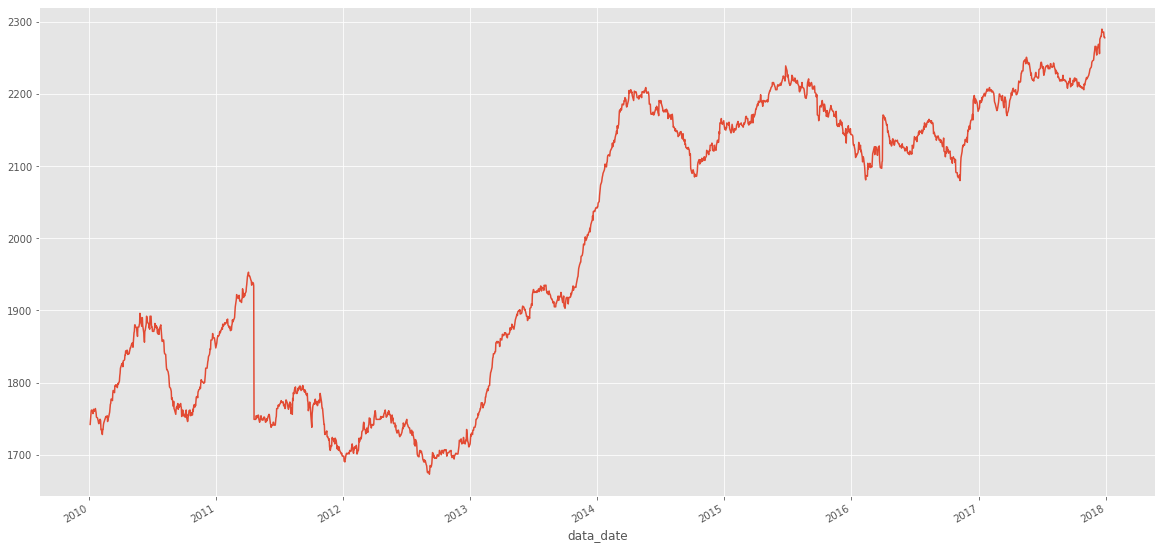

In [21]:
rsch_universe.loc[rsch_universe['in_trading_universe'] == 'Y'].groupby(['data_date']).size().plot()

In [22]:
ret_ptable = pd.pivot_table(rsch_universe, index='data_date', columns='security_id', values='ret1d')

In [23]:
print(ret_ptable.head().iloc[:10, 100:110], '\n\n')

# print(ret_ptable.tail().iloc[:, 100:110], '\n\n')

security_id  1091301701  1091302001  1091307301  1091321801  1091330301  \
data_date                                                                 
2010-01-04     0.008149    0.026596    0.009052   -0.014276    0.031165   
2010-01-05    -0.006928    0.025886    0.036260   -0.009413    0.007423   
2010-01-06     0.001744   -0.003011    0.058867   -0.008772    0.007895   
2010-01-07     0.006384    0.004053    0.004733    0.020649   -0.006267   
2010-01-08    -0.005767    0.034309    0.003426    0.014451    0.007357   

security_id  1091340801  1092037601  1092059001  1092204901  1092205001  
data_date                                                                
2010-01-04     0.028587    0.005032    0.007880   -0.014201    0.022362  
2010-01-05    -0.004117    0.001336   -0.006397    0.006701   -0.002302  
2010-01-06    -0.010336   -0.009333   -0.001431    0.012978    0.005769  
2010-01-07    -0.002089    0.005720    0.021490   -0.001642   -0.002677  
2010-01-08     0.016222   -0.0

In [24]:
## compute rolling 252, min_periods=66
print(rsch_universe['ret1d'].describe())
## for risk calculation, need to clip the return by +/- 10% to smooth out the spikes 
ret_ptable = ret_ptable.clip(-0.10, 0.10)

count    5.926216e+06
mean     7.150797e-04
std      2.878751e-02
min     -9.651200e-01
25%     -1.044763e-02
50%      2.266500e-04
75%      1.123602e-02
max      7.208862e+00
Name: ret1d, dtype: float64


In [25]:
# pandas use unbiased estimator (N-1 as denominator)
# while numpy not, to align them, pass ddof=1 to numpy function
# output of the annalized volatilty in percentage 
vol_ptable = ret_ptable.rolling(252, min_periods=66).std() * np.sqrt(252) * 100

# ffill by 2 or 3 days 
vol_ptable.fillna(method='ffill', limit=3, inplace=True)

In [26]:
risk_df = pd.melt(vol_ptable.reset_index(), id_vars=['data_date'], value_name='trisk')

In [27]:
risk_df.trisk.describe()

count    5.886103e+06
mean     3.595424e+01
std      1.501525e+01
min      7.427364e-01
25%      2.447572e+01
50%      3.296251e+01
75%      4.474610e+01
max      1.198365e+02
Name: trisk, dtype: float64

In [28]:
def wins_qnt_score(df, scorecol, dtcol, qmin=0.05, qmax=0.95):
    def _helper(x):
        l, u = np.nanquantile(x, qmin), np.nanquantile(x, qmax)
        x[x > u] = u
        x[x < l] = l
        return x
    return df.groupby(dtcol)[scorecol].transform(_helper)

In [29]:
x = risk_df.loc[risk_df['data_date'] == '2017-12-29', 'trisk'].values
print(x)
l, u = np.nanquantile(x, 0.05), np.nanquantile(x, 0.95)
print(l, u)

[19.66388205         nan 51.3421802  ... 24.07637867 61.79346893
 17.52086322]
13.606434444128643 60.04011496981742


In [30]:
risk_df['clip_trisk'] = wins_qnt_score(risk_df, 'trisk', 'data_date', qmin=0.05, qmax=0.95)

/home/jma/miniconda3/envs/python3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


In [31]:
print(df.tail())
print(risk_df.tail())
print(df.shape)
print(risk_df.shape)
print(risk_df[['clip_trisk', 'trisk']].describe())

         data_date security_id  close_price   volume  group_id  \
8798292 2017-12-29     9931801         2.62   637247  15104045   
8795890 2017-12-29      993201         9.76    72097  20107010   
8795891 2017-12-29      995201        78.82   495696  30202030   
8798293 2017-12-29     9962801         7.25    72519  35201010   
8795892 2017-12-29      996501       294.91  1824591  20101010   

        in_trading_universe     ret1d  
8798292                   N -0.029629  
8795890                   N -0.002045  
8795891                   Y -0.008429  
8798293                   N -0.026846  
8795892                   Y -0.004859  
         data_date security_id      trisk  clip_trisk
8015761 2017-12-22      996501  17.554887   17.554887
8015762 2017-12-26      996501  17.555740   17.555740
8015763 2017-12-27      996501  17.550179   17.550179
8015764 2017-12-28      996501  17.512604   17.512604
8015765 2017-12-29      996501  17.520863   17.520863
(8800015, 7)
(8015766, 4)
         clip

In [32]:
rsch_universe = pd.merge(rsch_universe, risk_df, on=['data_date', 'security_id'], how='left')

In [33]:
print(rsch_universe.isnull().sum())
print(rsch_universe.shape)

# number difference between total_rows and clip_trisk are 5927175 versus 265478
# this makes sense because daily in-univ versus all difference is 1000, over 2013 days, 

data_date                   0
security_id                 0
close_price                 0
volume                      0
group_id                    0
in_trading_universe         0
ret1d                     959
sector_id                   0
sector                      0
trisk                  265478
clip_trisk             265478
dtype: int64
(5927175, 11)


In [38]:
rsch_universe.to_csv(os.path.join(data_root, 'new_rsch_universe.csv.gz'), index=False, compression='gzip')

In [ ]:
rsch_universe.loc[rsch_universe['trisk'].isnull()].sample(10)

In [ ]:
rsch_universe.groupby('security_id').apply(lambda x: x['trisk'].isnull().sum()).sort_values().tail()

In [37]:
rsch_universe.loc[(rsch_universe['security_id'] == '1111428401') & (rsch_universe['data_date'].between('2013-02-01', '2014-09-01'))]

data_date security_id  close_price    volume  group_id  \
2884653 2014-01-17  1111428401        20.15  13000330  10102020   
2887658 2014-01-21  1111428401        20.28   1743106  10102020   
2890663 2014-01-22  1111428401        20.90    730214  10102020   
2893668 2014-01-23  1111428401        20.50    373575  10102020   
2896673 2014-01-24  1111428401        20.00    518882  10102020   
...            ...         ...          ...       ...       ...   
3347430 2014-08-25  1111428401        27.56    723644  10102020   
3350534 2014-08-26  1111428401        27.56    649765  10102020   
3353640 2014-08-27  1111428401        27.23    459601  10102020   
3356748 2014-08-28  1111428401        27.86    595259  10102020   
3359856 2014-08-29  1111428401        28.60    806212  10102020   

        in_trading_universe     ret1d  sector_id  sector      trisk  \
2884653                   N       NaN         10  Energy        NaN   
2887658                   N  0.006452         10  Energy        NaN   
2890663                   N  0.030572         10  Energy        NaN   
2893668                   N -0.019139         10  Energy        NaN   
2896673                   N -0.024391         10  Energy        NaN   
...                     ...       ...        ...     ...        ...   
3347430                   Y  0.020363         10  Energy  40.281974   
3350534                   Y  0.000000         10  Energy  40.149556   
3353640                   Y -0.011974         10  Energy  40.059657   
3356748                   Y  0.023136         10  Energy  40.017488   
3359856                   Y  0.026562         10  Energy  40.005915   

         clip_trisk  
2884653         NaN  
2887658         NaN  
2890663         NaN  
2893668         NaN  
2896673         NaN  
...             ...  
3347430   40.281974  
3350534   40.149556  
3353640   40.059657  
3356748   40.017488  
3359856   40.005915  

[156 rows x 11 columns]

In [35]:
trd_dates = pd.DataFrame({'data_date': np.sort(rsch_universe['data_date'].unique())})
trd_dates['pos_date'] = trd_dates['data_date'].shift(-1)
trd_dates['ret_date'] = trd_dates['data_date'].shift(-2)
print(trd_dates)

trd_dates.to_csv(os.path.join(data_root, 'new_trd_dates.csv.gz'), index=False, compression='gzip')

      data_date   pos_date   ret_date
0    2010-01-04 2010-01-05 2010-01-06
1    2010-01-05 2010-01-06 2010-01-07
2    2010-01-06 2010-01-07 2010-01-08
3    2010-01-07 2010-01-08 2010-01-11
4    2010-01-08 2010-01-11 2010-01-12
...         ...        ...        ...
2008 2017-12-22 2017-12-26 2017-12-27
2009 2017-12-26 2017-12-27 2017-12-28
2010 2017-12-27 2017-12-28 2017-12-29
2011 2017-12-28 2017-12-29        NaT
2012 2017-12-29        NaT        NaT

[2013 rows x 3 columns]
